# AdaBoost

Let us implement the AdaBoost algorithm, to build a powerful emsemble classifier from a set of weaker classifiers. Our base classifier will be a decision stump.

The training algorithm we will implement is as follows. We have $N$ training datapoints and are creating an ensemble of $k$ classifiers.

- Initialize the weights for all datapoints ($w_j = 1/N$ for $j=1,2,...N$)
- For $i = 1$ to $k$
    - Form training set $D_i$ by sampling $N$ tuples (with replacement) from the full training dataset. The sampling probability for a tuple $(x_j,y_j)$ should be given by its corresponding weight $w_j$.
    - Use dataset $D_i$ to fit a decision stump $M_i$. You can use sklearn's DecisionTreeClassifier with max_depth=1 to fit a decision stump.
    - Calculate the error rate for $M_i$ using the sum of the weights of the misclassified points.
    $$err(M_i) = \sum_{j=1}^N w_j * \mathbb{1}\{y_j \ne M_i(x_j)\}$$
    - The weight of classifier $M_i$'s vote is computed as $\alpha_i = 0.5*\log(\frac{1-err(M_i)}{err(M_i)})$
    - Increase the weight of the misclassified training points, and decrease the weight of the correctly classified training points.
    $$w_j \leftarrow w_j * \exp\{- \alpha_i * y_j * M_i(x_j)\}$$
    - Remember to normalize the weights so that they sum to 1.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [3]:
# Import the libraries / functions that you use in your solution
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import math
import pandas as pd

def train_AdaBoost(X, y, k):
    
    classifiers = []
    alphas = []
    
    ### BEGIN SOLUTION
    
    N = X.shape[0]
    D = np.concatenate((X, y.reshape(-1, 1)), axis=1)
    
    # Initialize weights
    weights = [1/N]*len(D)
    
    for i in range(k):
        # Sample from the dataset according to weights 
        
        D_i = [D[np.random.choice(range(len(D)), p = weights)] for _ in range(N)]
        X_i = [r[:-1] for r in D_i]
        Y_i = [r[-1] for r in D_i]
        
        # Fit a decision stump 
        
        M_i = DecisionTreeClassifier(max_depth = 1, random_state = 0)
        M_i.fit(X_i, Y_i)
        
        # Calculate the error rate

        train_preds = M_i.predict(X_i)
        err_M_i = np.dot(np.array(weights), ~np.equal(train_preds, Y_i))
        
        # Calculate the weight of classifier's vote
        eps = 0.001  # Term to prevent division by zero in case a classifier gets all points right
        log_term = (1 - err_M_i)/(err_M_i + eps)
        alpha_i = 0.5*math.log(log_term)
        
        # Increase the weight of misclassified points
        
        weights = np.multiply(weights, np.exp(-1*alpha_i*train_preds*Y_i))
        weights = weights/sum(weights)
        
        # Append your classifier to the list classifiers
        
        classifiers.append(M_i)
        
        # Append your alpha to the list alphas
        
        alphas.append(alpha_i)
        
    ### END SOLUTION
    
    # classifiers and alphas need of be of type <class 'list'>
    return classifiers, alphas

To obtain predictions, the vote of each classifier $M_i$ is weighted by its corresponding coefficient $\alpha_i$.

$$y_i = \text{sign}\{\sum_{i=1}^k \alpha_i*M_i(x_i)\}$$

In [4]:
def predict_AdaBoost(X,classifiers, alphas):
    
    ### BEGIN SOLUTION
    
    classifier_preds = [M.predict(X) for M in classifiers]
    y_pred = np.sign(np.dot(alphas, classifier_preds))
    
    ### END SOLUTION
    
    # y_pred needs to be of type <class 'numpy.ndarray'>
    return y_pred

The below function will help you plot the decision surface given by the algorithm.

In [5]:
def plot_AdaBoost(X, y, classifiers, alphas):
    
    # Get limits of x and y for plotting the decision surface
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    # Get points at a distance of h between the above limits 
    h = .02    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    
    # Classify the all the points
    P = predict_AdaBoost(temp, classifiers, alphas).reshape(yy.shape)
    
    # Plot the decision boundary and margin
    plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()

Load the given datasets.

In [6]:
X_train = pd.read_csv('Dataset3/X_train.csv', header = None)
y_train = pd.read_csv('Dataset3/y_train.csv', header = None)
X_test = pd.read_csv('Dataset3/X_test.csv', header = None)
y_test = pd.read_csv('Dataset3/y_test.csv', header = None)

Plot the training data as a scatter plot.

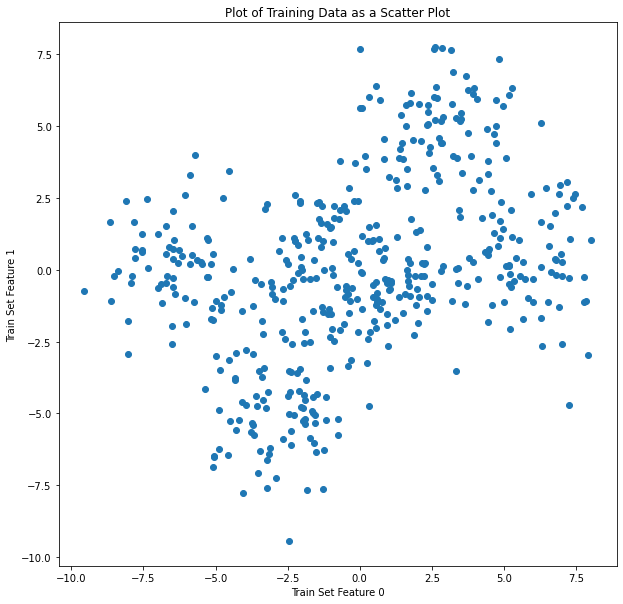

In [7]:
plt.figure(figsize = (10,10))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1])
plt.title('Plot of Training Data as a Scatter Plot')
plt.xlabel('Train Set Feature 0')
plt.ylabel('Train Set Feature 1')
plt.show()

Use the train_AdaBoost function to train an AdaBoost model with k=5.

In [8]:
X = X_train.to_numpy()
y = y_train.to_numpy()

classifiers, alphas = train_AdaBoost(X, y, k=5)

Use the predict_AdaBoost function to make predictions on X_test.

In [9]:
X_T = X_test.to_numpy()
preds = predict_AdaBoost(X_T, classifiers, alphas)

Use the plot_AdaBoost function to plot the learnt decision surface.

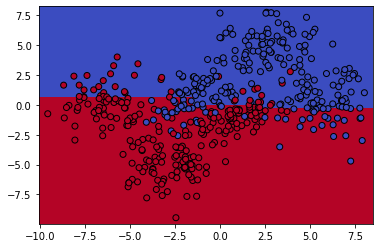

In [10]:
plot_AdaBoost(X, y, classifiers, alphas)

Compute the accuracy of the predictions on the test set.

In [11]:
print(accuracy_score(preds, y_test)*100)

77.5


Use the train_AdaBoost function to train an AdaBoost model with k=100.

In [12]:
classifiers, alphas = train_AdaBoost(X, y, k=100)

Use the predict_AdaBoost function to make predictions on X_test.

In [13]:
preds = predict_AdaBoost(X_T, classifiers, alphas)

Use the plot_AdaBoost function to plot the learnt decision surface.

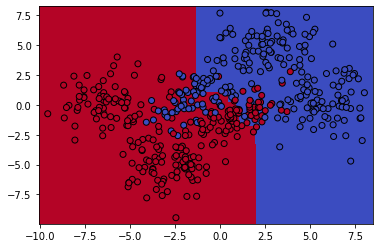

In [14]:
plot_AdaBoost(X, y, classifiers, alphas)

Compute the accuracy of the predictions on the test set.

In [15]:
print(accuracy_score(preds, y_test)*100)

83.33333333333334
